# Instructions

1. This assignment is worth 5% of the final grade.
2. Insert cells (code or markdown, as appropriate) below each question and fill in your answers there.
2. You are required to work on this individually. Any form of plagiarism will result in 0.
3. Please submit your notebook file (name it ``IND5003_A1_<Your_Name>.ipynb``) through Canvas before **17th Sep 2023 23:59hrs**.

# Question 1

The file `resale_flat_prices.csv` contains resale flat prices in Singapore from January 2017 onwards. The file `town_type_region.xlsx` contains the classification of each town as *mature* or *non-mature* and each town's geographical region (*north*, *north-east*, *east*, *west*, or *central*). Use these two files to answer the following questions:

1. In the period January 2022 to June 2022, was the mean resale price **per square metre per year of remaining lease** of 4 ROOM flats the same for all geographical regions?
2. In the period July 2022 to December 2022, was there any difference in the distribution of geographical regions for each resale flat type? (Please **omit** 1 ROOM and MULTI-GENERATION flats from this analysis.)

It is up to you to choose the appropriate hypothesis test, and to perform the five steps for each question.

In [1]:
# Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from myscripts import inference

In [2]:
# Import the data required
resale_prices_df = pd.read_csv('../data/resale_flat_prices.csv')
town_type_df = pd.read_excel('../data/town_type_region.xlsx')

In [3]:
# Print the first few lines of the data to take a look at it
display(resale_prices_df.head())
display(town_type_df.head())

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


,town,type,region
0,BUKIT BATOK,non-mature,west
1,BUKIT PANJANG,non-mature,west
2,CHOA CHU KANG,non-mature,west
3,HOUGANG,non-mature,north-east
4,JURONG EAST,non-mature,west


In [4]:
# Check what is the size of the data
display(town_type_df.info())
display(resale_prices_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   town    27 non-null     object
 1   type    27 non-null     object
 2   region  27 non-null     object
dtypes: object(3)
memory usage: 780.0+ bytes


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160564 entries, 0 to 160563
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                160564 non-null  object 
 1   town                 160564 non-null  object 
 2   flat_type            160564 non-null  object 
 3   block                160564 non-null  object 
 4   street_name          160564 non-null  object 
 5   storey_range         160564 non-null  object 
 6   floor_area_sqm       160564 non-null  float64
 7   flat_model           160564 non-null  object 
 8   lease_commence_date  160564 non-null  int64  
 9   remaining_lease      160564 non-null  object 
 10  resale_price         160564 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 13.5+ MB


None

The 2 datasets are different in size.  
The resale price dataset have town.  
The town type can be used to map the town type in resale price dataset.     

In [5]:
# Create town mapper dictionary
town_type_mapper_dict={}
for idx, town in enumerate(town_type_df["town"]):
    town_type_mapper_dict[town] = [str(town_type_df.iloc[idx, 1]), str(town_type_df.iloc[idx, 2])]
town_type_mapper_dict

{'BUKIT BATOK': ['non-mature', 'west'],
 'BUKIT PANJANG': ['non-mature', 'west'],
 'CHOA CHU KANG': ['non-mature', 'west'],
 'HOUGANG': ['non-mature', 'north-east'],
 'JURONG EAST': ['non-mature', 'west'],
 'JURONG WEST': ['non-mature', 'west'],
 'PUNGGOL': ['non-mature', 'north-east'],
 'SEMBAWANG': ['non-mature', 'north'],
 'SENGKANG': ['non-mature', 'north-east'],
 'TENGAH': ['non-mature', 'west'],
 'WOODLANDS': ['non-mature', 'north'],
 'YISHUN': ['non-mature', 'north'],
 'ANG MO KIO': ['mature', 'north-east'],
 'BEDOK': ['mature', 'east'],
 'BISHAN': ['mature', 'central'],
 'BUKIT MERAH': ['mature', 'central'],
 'BUKIT TIMAH': ['mature', 'central'],
 'CENTRAL AREA': ['mature', 'central'],
 'CLEMENTI': ['mature', 'west'],
 'GEYLANG': ['mature', 'central'],
 'KALLANG/WHAMPOA': ['mature', 'central'],
 'MARINE PARADE': ['mature', 'central'],
 'PASIR RIS': ['mature', 'east'],
 'QUEENSTOWN': ['mature', 'central'],
 'SERANGOON': ['mature', 'north-east'],
 'TAMPINES': ['mature', 'east'],


In [6]:
# Check what is the resale flat dataset
display(resale_prices_df["town"].unique())
display(len(resale_prices_df["town"].unique()))

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT PANJANG', 'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG',
       'CLEMENTI', 'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'PASIR RIS', 'PUNGGOL',
       'QUEENSTOWN', 'SEMBAWANG', 'SENGKANG', 'SERANGOON', 'TAMPINES',
       'TOA PAYOH', 'WOODLANDS', 'YISHUN'], dtype=object)

26

It can be seen that the entry of town is matched.  
A mapper can be used to add column to the resale price df based on the "town" column.  

In [7]:
# Function to map town to type and region
def map_town(row):
    '''This function add type and region to the original df row-wise
    '''
    town = row["town"]
    if town in town_type_mapper_dict:
        row["type"], row["region"] = town_type_mapper_dict[town]
    return row

# Apply the mapping function to the DataFrame
resale_prices_df = resale_prices_df.apply(map_town, axis=1)

resale_prices_df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,type,region
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0,mature,north-east
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0,mature,north-east
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0,mature,north-east
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0,mature,north-east
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0,mature,north-east


In [9]:
# Filter the dates to make a smaller subset
# Create a boolean mask to filter the date range
start_date = pd.to_datetime("2022-01")
end_date = pd.to_datetime("2022-06")
later_than_start = (pd.to_datetime(resale_prices_df['month']) >= start_date)
ealier_than_end = (pd.to_datetime(resale_prices_df['month']) <= end_date)
is_4_rm = (resale_prices_df['flat_type']=='4 ROOM')
mask = (later_than_start & ealier_than_end & is_4_rm)

# Apply the mask to filter the DataFrame
resale_june_df = resale_prices_df[mask].copy(deep=True)
resale_june_df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,type,region
116724,2022-01,ANG MO KIO,4 ROOM,438,ANG MO KIO AVE 10,10 TO 12,92.0,New Generation,1979,56 years 01 month,488000.0,mature,north-east
116725,2022-01,ANG MO KIO,4 ROOM,556,ANG MO KIO AVE 10,13 TO 15,92.0,New Generation,1980,57 years 01 month,452888.0,mature,north-east
116726,2022-01,ANG MO KIO,4 ROOM,419,ANG MO KIO AVE 10,07 TO 09,99.0,New Generation,1979,56 years 08 months,460000.0,mature,north-east
116727,2022-01,ANG MO KIO,4 ROOM,466,ANG MO KIO AVE 10,04 TO 06,93.0,New Generation,1984,61 years 09 months,448000.0,mature,north-east
116728,2022-01,ANG MO KIO,4 ROOM,472,ANG MO KIO AVE 10,01 TO 03,92.0,New Generation,1979,56 years 07 months,419000.0,mature,north-east


In [10]:
# Perform EDA on the dataset
resale_june_df.shape

(5587, 13)

The dataset is now complete and ready for analysis.  
Time to proceed onto part 1.
* Q1.1. In the period January 2022 to June 2022, was the mean resale price per square metre per year of remaining lease of 4 ROOM flats the same for all geographical regions?   
------
Steps to ans:  
*Step 1*: Find the resale price per square meter per year for the 5587 flats  
*Step 2*: Group these flats by geographical locations  
*Step 3*: Compare the mean of these locations and provide graphical displays   

Step 1.1: Find the remaining lease in years  
There are 3 types of formats in the column.  
xx years xx month  
xx years xx months  
xx years   
Extract the full years, if month or months are available, extract them too.   
Use .split() method on string and then convert the numerical value to float.

In [11]:
# Function to extract years as a float
def extract_years(years_str):
    '''This function extract out the year from years
    and extract out month from month and months if available
    '''
    # Split the string by whitespace
    parts = years_str.split()
    
    # Initialize years and months
    years = 0.0
    months = 0.0
    
    # Convert the first part to years
    if len(parts) >= 2:
        years = float(parts[0])
    
    # Convert the second part to months if it exists
    if len(parts) >= 4:
        months = float(parts[2])
    
    # Calculate the total years including fractional years for months
    total_years = years + (months / 12.0)
    
    return total_years

# Apply the function to the "years_left" column
resale_june_df["years_left"] = resale_june_df["remaining_lease"].apply(extract_years)

# Display the DataFrame with the calculated "years_left_numeric" column
resale_june_df.head()


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,type,region,years_left
116724,2022-01,ANG MO KIO,4 ROOM,438,ANG MO KIO AVE 10,10 TO 12,92.0,New Generation,1979,56 years 01 month,488000.0,mature,north-east,56.083333
116725,2022-01,ANG MO KIO,4 ROOM,556,ANG MO KIO AVE 10,13 TO 15,92.0,New Generation,1980,57 years 01 month,452888.0,mature,north-east,57.083333
116726,2022-01,ANG MO KIO,4 ROOM,419,ANG MO KIO AVE 10,07 TO 09,99.0,New Generation,1979,56 years 08 months,460000.0,mature,north-east,56.666667
116727,2022-01,ANG MO KIO,4 ROOM,466,ANG MO KIO AVE 10,04 TO 06,93.0,New Generation,1984,61 years 09 months,448000.0,mature,north-east,61.750000
116728,2022-01,ANG MO KIO,4 ROOM,472,ANG MO KIO AVE 10,01 TO 03,92.0,New Generation,1979,56 years 07 months,419000.0,mature,north-east,56.583333


In [12]:
# Define a function
def price_per_sqm_per_yr_left(row):
    '''This function calculte the resale price 
    per square meter per year of lease left for a row
    '''
    row["price_p_sqm_p_yr"] = row["resale_price"] / row["floor_area_sqm"] / row["years_left"]
    return row
# Apply the mapping function to the DataFrame
resale_june_df = resale_june_df.apply(price_per_sqm_per_yr_left, axis=1)

In [13]:
resale_june_df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,type,region,years_left,price_p_sqm_p_yr
116724,2022-01,ANG MO KIO,4 ROOM,438,ANG MO KIO AVE 10,10 TO 12,92.0,New Generation,1979,56 years 01 month,488000.0,mature,north-east,56.083333,94.579753
116725,2022-01,ANG MO KIO,4 ROOM,556,ANG MO KIO AVE 10,13 TO 15,92.0,New Generation,1980,57 years 01 month,452888.0,mature,north-east,57.083333,86.237004
116726,2022-01,ANG MO KIO,4 ROOM,419,ANG MO KIO AVE 10,07 TO 09,99.0,New Generation,1979,56 years 08 months,460000.0,mature,north-east,56.666667,81.996435
116727,2022-01,ANG MO KIO,4 ROOM,466,ANG MO KIO AVE 10,04 TO 06,93.0,New Generation,1984,61 years 09 months,448000.0,mature,north-east,61.750000,78.011406
116728,2022-01,ANG MO KIO,4 ROOM,472,ANG MO KIO AVE 10,01 TO 03,92.0,New Generation,1979,56 years 07 months,419000.0,mature,north-east,56.583333,80.489210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129780,2022-06,YISHUN,4 ROOM,610,YISHUN ST 61,07 TO 09,84.0,Simplified,1986,63 years 01 month,420000.0,non-mature,north,63.083333,79.260238
129781,2022-06,YISHUN,4 ROOM,720,YISHUN ST 71,04 TO 06,84.0,Simplified,1985,62 years 02 months,395000.0,non-mature,north,62.166667,75.641517
129782,2022-06,YISHUN,4 ROOM,715,YISHUN ST 71,04 TO 06,84.0,Simplified,1987,64 years 01 month,400000.0,non-mature,north,64.083333,74.308007
129783,2022-06,YISHUN,4 ROOM,749,YISHUN ST 72,10 TO 12,92.0,New Generation,1984,61 years 01 month,530000.0,non-mature,north,61.083333,94.311644


In [14]:
resale_june_df['region'].unique()

array(['north-east', 'east', 'central', 'west', 'north'], dtype=object)

In [15]:
north_east_df = resale_june_df.loc[resale_june_df['region']=='north-east']
north_east_df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,type,region,years_left,price_p_sqm_p_yr
116724,2022-01,ANG MO KIO,4 ROOM,438,ANG MO KIO AVE 10,10 TO 12,92.0,New Generation,1979,56 years 01 month,488000.0,mature,north-east,56.083333,94.579753
116725,2022-01,ANG MO KIO,4 ROOM,556,ANG MO KIO AVE 10,13 TO 15,92.0,New Generation,1980,57 years 01 month,452888.0,mature,north-east,57.083333,86.237004
116726,2022-01,ANG MO KIO,4 ROOM,419,ANG MO KIO AVE 10,07 TO 09,99.0,New Generation,1979,56 years 08 months,460000.0,mature,north-east,56.666667,81.996435
116727,2022-01,ANG MO KIO,4 ROOM,466,ANG MO KIO AVE 10,04 TO 06,93.0,New Generation,1984,61 years 09 months,448000.0,mature,north-east,61.750000,78.011406
116728,2022-01,ANG MO KIO,4 ROOM,472,ANG MO KIO AVE 10,01 TO 03,92.0,New Generation,1979,56 years 07 months,419000.0,mature,north-east,56.583333,80.489210


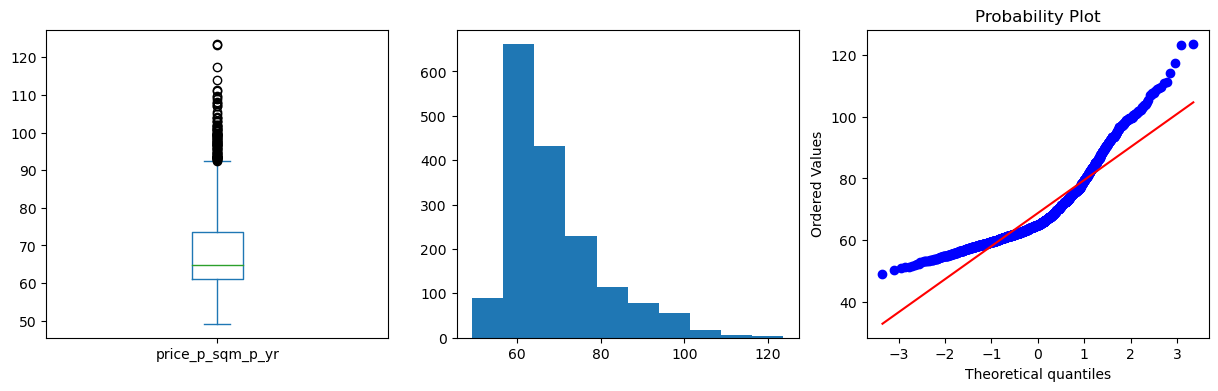

In [16]:
# See the data set to see if they are of the same group
inference.check_normality(north_east_df['price_p_sqm_p_yr'])

In [17]:
north_east_df.shape

(1688, 15)

In [ ]:
# Need to show the distribution of data in each region
# Then do a hypo test to see if they are the same.

# Assignment 1 Due on Sunday  
# Next Sunday 2 data camps due    
# Next week no physical class, reserved for project discussion   
# Plan project proposal idea  
where is the data, what r u trying to get out of the data
# Shld be questions you want to answer with your data

In [13]:
region_mean = resale_june_df.groupby("region").mean(numeric_only=True)
region_mean

,floor_area_sqm,lease_commence_date,resale_price,years_left,price_p_sqm_p_yr
region,,,,,
central,92.835616,1998.524462,697475.331585,75.827870,99.374415
east,97.951253,1992.440111,512002.892758,69.791783,75.905445
north,94.680214,2000.610695,460684.142118,77.902228,63.376665
north-east,93.463863,2005.951422,527832.780806,83.261898,68.809559
west,96.255719,2000.812092,499709.852778,78.141408,67.380671


#### Q1.1 Ans:
From the above table, we can clearly see that the price per sqm per year remaining is different for different regions.  
The central region is the most expensive, and the price difference is large, having a $25 gap with the next expensive region, east.  
The north region is the least expensive, but is similar in price as compared to three other regions, west and north-west.  

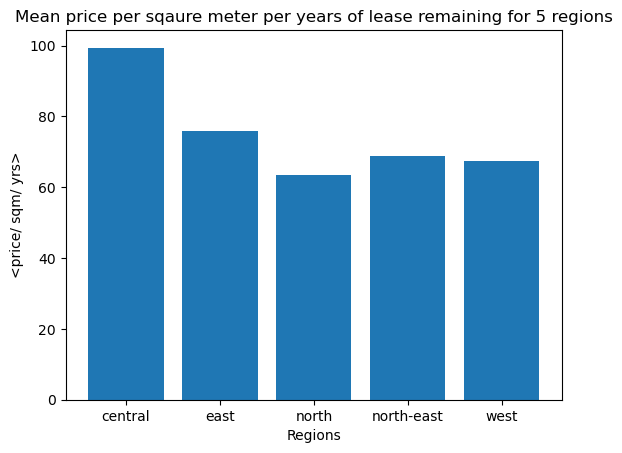

In [18]:
plt.bar(x=region_mean.index, height=region_mean['price_p_sqm_p_yr'])
plt.title("Mean price per sqaure meter per years of lease remaining for 5 regions")
plt.xlabel("Regions")
plt.ylabel("<price/ sqm/ yrs>")
plt.show()

Time to proceed on to part 2  
* Q1.2 In the period July 2022 to December 2022, was there any difference in the distribution of geographical regions for each resale flat type? (Please omit 1 ROOM and MULTI-GENERATION flats from this analysis.)
----
Steps to ans:  
*step1*: Find the dataset containing data from jul 2022 to dec 2022.    
*step2*: Omit `1 ROOM` and `MULTI-GENERATION` flats from the dataset.  
*step3*: Find the distribution of the data by geographical regions.  

In [19]:
# Shouldn't a simple mean mode median using .describe() be enough???

In [91]:
pattern = r'(\d+)\s*years?\s*(\d+)\s*months?'
resale_june_df[['years', 'months']] = resale_june_df['remaining_lease'].str.extract(pattern)
resale_june_df[['years', 'months']] = resale_june_df[['years', 'months']]
resale_june_df.isnull().sum()

month                    0
town                     0
flat_type                0
block                    0
street_name              0
storey_range             0
floor_area_sqm           0
flat_model               0
lease_commence_date      0
remaining_lease          0
resale_price             0
type                     0
region                   0
price_p_sqm_p_yr         0
years                  432
months                 432
dtype: int64

In [63]:

# Use regular expressions to extract years and months
pattern = r'(\d+)\s*years?\s*(\d+)\s*months?'
resale_june_df[['years', 'months']] = resale_june_df['remaining_lease'].str.extract(pattern).astype(int)

# Calculate the numerical value for years left as a float
resale_june_df['years_left_numeric'] = resale_june_df['years'] + resale_june_df['months'] / 12.0

# Display the DataFrame with the calculated "years_left_numeric" column
print(resale_june_df)


ValueError: cannot convert float NaN to integer

# Question 2

The secretary problem *in its simplest form* has the following features.

1. There is one secretarial position available.
2. The number $n$ of applicants is known.
3. The applicants are interviewed sequentially in random order, each order being equally likely.
4. It is assumed that you can rank all the applicants from best to worst without ties. The decision to accept or reject an applicant must be based only on the relative ranks of those applicants interviewed so far.
5. An applicant once rejected cannot later be recalled.
6. You are very particular and will be satisfied with nothing but the very best.

This basic problem has a remarkably simple solution. First, one shows that attention can be restricted to the class of rules that for some integer $r \ge 1$ rejects the first $r - 1$ applicants, and then chooses the next applicant who is best in the relative ranking of the observed applicants. For such a rule, the probability, $p_n(r)$, of selecting the best applicant is $1/n$ for $r = 1$, and for $r > 1$,
\begin{equation}
  p_n(r) = \frac{r - 1}{n} \sum_{i=r}^n \frac{1}{i - 1}.
\end{equation}
The optimal $r$ is the one that maximises this probability. For small values of $n$, the optimal $r$ can easily be computed. For example, when $n = 11$, the function $p_n(r)$ takes on its maximum value when $r = 5$.

When $n = 11$ and using the optimal solution outlined above, use **simulation** to answer the following questions:

1. What is the probability that you **could not find an acceptable applicant?**
2. How many applicants do you expect to interview **by the time you accept an applicant?**